# Validation of Summit Subsurface Snow Temperature Model

### (Using data from Noone et al from 1 July 2013 - 30 June 2014)

In [2]:
from mat4py import loadmat

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [27]:
def mat2xarray(case):
    # ....Dates
    jday  = np.array(case['jday']).flatten()
    dates = pd.to_datetime(pd.Timestamp(2018,12,31).to_julian_date() + jday, unit='D', origin='julian')
    # ....Depth in snow
    Lz    = np.array(case['Lz']).flatten()
    # ....Snow density
    rho   = np.interp(Lz, np.array(case['z_vpw']).flatten(), np.array(case['rho_vpw']).flatten())
    # ....Snow temperature array
    phi1  = np.array(case['phi1'])[1:, 1:]
    
    ds = xr.Dataset({'snow temperature': (['depth', 'date'], phi1), 'snow density': (['depth'], rho)}, coords={'depth': -Lz, 'date': dates})
    return ds

In [39]:
def plot_case(ds, btime, etime, depth=-2):
    fig = plt.figure(figsize=(26,10))
    gs = GridSpec(nrows=1, ncols=2)
    
    ax1 = fig.add_axes([0.1, 0.1, 0.05, 0.9])
    ds['snow density'].plot(y='depth', ylim=[depth, 0])
    
    ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.9])
    ax2.axes.set_yticklabels([])
    cf1=ds['snow temperature'].sel(date=slice(btime,etime)).plot.contour(levels=np.arange(-30,2,1), cmap='k', linewidths=0.5, ylim=[depth, 0])
    ax2.clabel(cf1, cf1.levels[::2], inline=True, fontsize=10, fmt='%1.0f')
    ds['snow temperature'].sel(date=slice(btime,etime)).plot.contourf(levels=np.arange(-30,2,0.5), cmap='Blues_r', ylim=[depth, 0])
    ax2.axes.set_ylabel('')
    plt.grid()
    
    return

def plot_case_diff(data2, data1, btime, etime, Tmin=-10, Tmax=10, dT=0.5, depth=-2):
    # !! Note that the reference case is listed as the second input; ds2 - ds1 !!
    fig = plt.figure(figsize=(26,10))
    gs = GridSpec(nrows=1, ncols=2)
    
    ax1 = fig.add_axes([0.1, 0.1, 0.05, 0.9])
    data1['snow density'].plot(y='depth', ylim=[depth, 0])
    data2['snow density'].plot(y='depth', ylim=[depth, 0])
    
    ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.9])
    ax2.axes.set_yticklabels([])
    cf1=(data2['snow temperature']-data1['snow temperature']).sel(date=slice(btime,etime)).plot.contour(levels=np.arange(Tmin,Tmax+0.5,1), cmap='k', linewidths=0.5, ylim=[depth, 0])
    ax2.clabel(cf1, inline=True, fontsize=10, fmt='%1.0f')
    (data2['snow temperature']-data1['snow temperature']).sel(date=slice(btime,etime)).plot.contourf(levels=np.arange(Tmin,Tmax+0.5,dT), cmap='RdBu_r', ylim=[depth, 0])
    ax2.axes.set_ylabel('')
    plt.grid()
    
    return

In [40]:
validation2014 = mat2xarray(loadmat('/Users/vonw/data/summit/MeltEvents2019/output/validation2014.mat'))

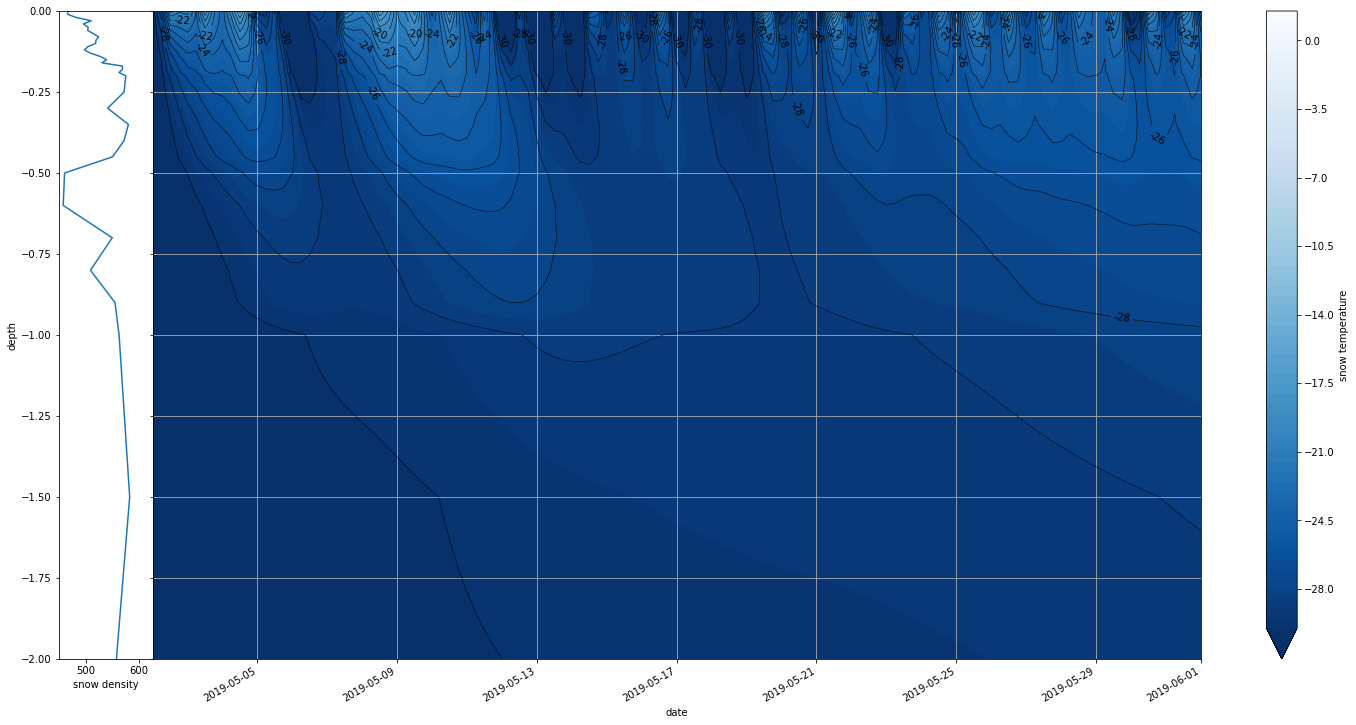

In [41]:
plot_case(validation2014, depth=-2, btime=validation2014.date[0], etime=validation2014.date[-1])

In [50]:
validation2014

<xarray.Dataset>
Dimensions:           (date: 121, depth: 43)
Coordinates:
  * depth             (depth) float64 -0.0 -0.01 -0.02 -0.03 ... -5.5 -6.0 -6.5
  * date              (date) datetime64[ns] 2019-05-02 ... 2019-06-01
Data variables:
    snow temperature  (depth, date) float64 -30.9 -27.18 -19.42 ... -30.3 -30.3
    snow density      (depth) float64 465.3 465.3 481.2 ... 617.0 617.0 617.0

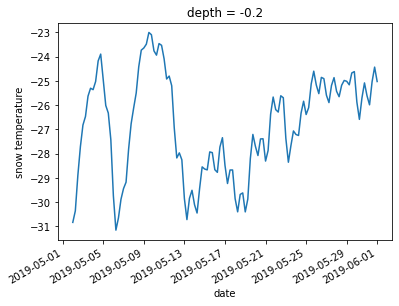

In [53]:
validation2014['snow temperature'].sel(depth=-0.2).plot()

In [5]:
density_july_2014 = loadmat('/Users/vonw/data/summit/MeltEvents2019/NooneEtAl/density_july_2014.mat')
depth = -np.array(density_july_2014['depth'])
density_avg = np.array(density_july_2014['avg'])
snowDensity = xr.DataArray(density_avg, coords=[depth], dims=['depth'])

In [14]:
snowDensity.depth.values/100

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [13]:
snowDensity.values*1e6/1000

array([         nan, 465.30909091, 481.2034632 , 509.63116883,
       494.82341427, 503.76525503, 503.15324675, 513.66753247,
       523.40606061, 518.61991342, 517.8055336 , 503.42714097,
       496.77299078, 508.1969697 , 526.18787879, 538.34202899,
       529.85142104, 568.38787879, 568.25454545, 561.84822134,
       574.60274798, 578.61095426, 570.81991342, 577.43116883,
       582.56969697, 571.45454545, 578.72938076, 561.95091286,
       550.11948052, 540.03463203, 540.48658009, 531.23568605,
       524.09215133, 556.79393939, 591.74112554, 579.5012987 ,
       559.85194805, 570.02964427, 563.26785244, 578.72727273,
       571.34545455, 553.45367965, 533.97839262, 528.02281197,
       535.08225108, 549.74891775, 568.74199134, 527.98354978,
       539.98716356, 521.02371542, 459.50021959, 423.35353535,
       409.91040843, 405.82608696, 423.85507246, 446.68511199,
       452.2345191 , 455.27536232, 455.56521739, 438.95388669,
       456.91172596, 501.35309618, 543.32981994, 566.30

In [24]:
snowDensity[258]

<xarray.DataArray ()>
array(0.53591304)
Coordinates:
    depth    float64 258.0

In [25]:
snowDensity.depth[258]

<xarray.DataArray 'depth' ()>
array(258.)
Coordinates:
    depth    float64 258.0

In [11]:
np.arange(0,3.01,0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

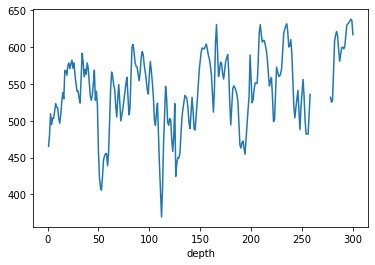

In [42]:
(snowDensity*1e6/1000).plot()

### Equation for density at depth (from smtsnowdensity.xlsx, Chris Cox, September 2020)

$$ \rho = 0.1507 ln(z) - 0.5276 $$

where $\rho$ is the snow density in g cm-3 and z is the depth in cm (+ is downward; different sign from mat file)

Populating the interactive namespace from numpy and matplotlib


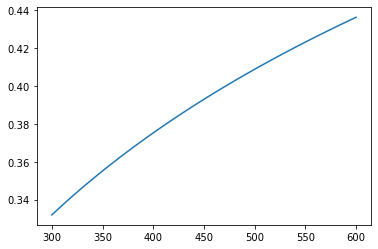

In [28]:
%pylab inline
z = np.arange(300, 600.5, 5)       # 3 to 6.5 meters
rho = 0.1507*np.log(z) - 0.5276
plot(z,rho)